In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, make_scorer, classification_report, auc, roc_curve, recall_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
R  = '\033[31m' # red

<a id='top'></a>

# Table of content

[1. About the Project](#1. About the Project)
- a) Introduction
- b) Data Overview
- c) Evaluation and Visualization of featrues

[2. Part 1: Simple classification with different models ](#Part 1: Simple classification with different models)
- a) KNN
- b) Logistic Regression
- c) SVC – both linear and kernelled
- d) Decision Tree
- e) Naïve Bays Classification
- f) Random Forest

[3. Part 2: Evaluation by different evaluation techniques ](#Part 2: Evaluation by different evaluation techniques)


[4. Part 3: Ensemble, Baggaing and Pasting](#Part 3: Ensemble, Baggaing and Pasting)
- a) Ensemble
- b) Baggaing
- c) Pasting

[5. Part 4: Boosting](#Part 4: Boosting)
- a) Adaboosting
- b) Gradient boosting

[6. Part 5: PCA](#Part 5: PCA)

<a id='1. About the Project'></a>

# 1. About the Project

## 1. a) Introduction
The data set recorded fraud transcations over a period of time. Features are tranformed for confidentiality.

## 1. b) Data Overview

### Loading the dataset and basic information

In [2]:
data = pd.read_csv('/Users/tWo/Documents/UTD/BUAN 6341 Machine Learning/Project 3/fraud_data.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print('Columns are: \n', list(data.columns.values))
print('\nData has shape: ', data.shape)
print('\nData has structure: ')
data.info()

Columns are: 
 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Data has shape:  (284807, 31)

Data has structure: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null fl

#### Percentage of Class

There is only 0.17% are the Fraud transcations, while 99.83% are the Normal transcations.

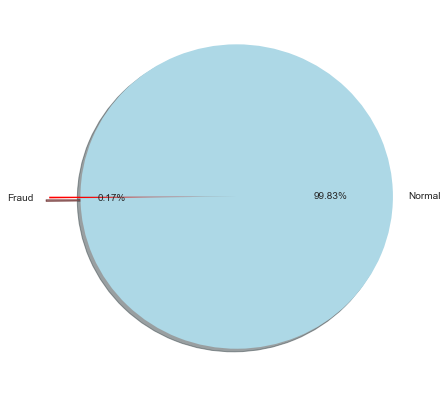

Number of fraud transcations is 492


In [4]:
plt.figure(figsize=(7,7))
plt.pie([len(data[data['Class']==1]), len(data[data['Class']==0])], explode=(0.2, 0),
        labels=['Fraud', 'Normal'], colors=['red', 'lightblue'], autopct='%1.2f%%', shadow=True, startangle=180)
plt.show()

print('Number of fraud transcations is {}'.format(len(data['Class'].loc[data['Class']==1])))

#### Convert seconds to hours 

We can clearly see the frequency of each class over hour of the day.<br>
The high-volumn of fraud transaction is around 3AM to 4AM and 12PM to 1PM (compared with entire fraud transaction)

In [5]:
data['mTime']=data['Time'].apply(lambda x: (np.ceil(x/3600))%24)
# data.head()

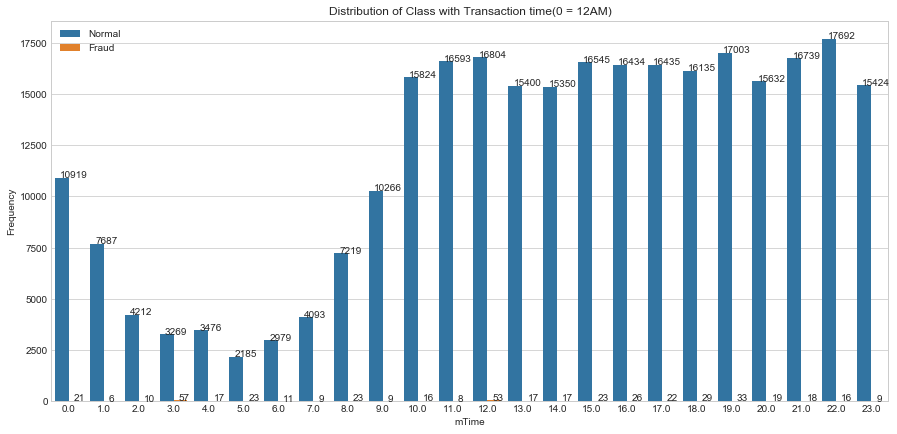

In [6]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
sns.countplot(x='mTime', hue='Class', data=data)
plt.title('Distribution of Class with Transaction time(0 = 12AM)')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.ylabel('Frequency')
plt.legend(['Normal', 'Fraud'])
plt.show()

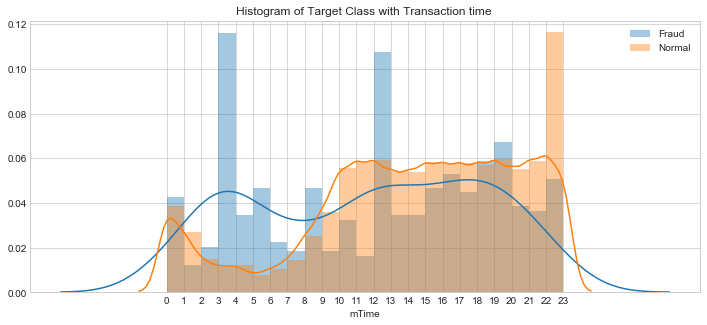

In [7]:
plt.figure(figsize=(12,5))
ax = plt.subplot()
max_nbins = list(range(0,24))
sns.distplot(data['mTime'][data.Class == 1], bins=max_nbins, label='Fraud')
sns.distplot(data['mTime'][data.Class == 0], bins=max_nbins, label='Normal')
plt.xticks(range(0,24))
ax.set_title('Histogram of Target Class with Transaction time ')
plt.legend(loc='best')
plt.show()

In [8]:
# Define a function for an overlaid histogram
def overlaid_histogram(df,norm):
    # Set the bounds for the bins so that the two distributions are
    # fairly compared
    max_nbins = list(range(0,24))
#     data_range = [min(min(data1), min(data2)), max(max(data1), max(data2))]
#     binwidth = (data_range[1] - data_range[0]) / max_nbins
#     bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)
    plt.figure(figsize=(15,4))
    sns.distplot(data[data['Class']==0]['mTime'],
                 norm_hist=norm,
                 bins=max_nbins,
                 kde=False,
                 color='b',
                 hist_kws={'alpha':.5},
                 label='Normal')
    sns.distplot(data[data['Class']==1]['mTime'],
                 norm_hist=norm,
                 bins=max_nbins,
                 kde=False,
                 color='r',
                 label='Fraud',
                 hist_kws={'alpha':.5})
    plt.xticks(range(0,24))
    plt.legend()
    plt.show()

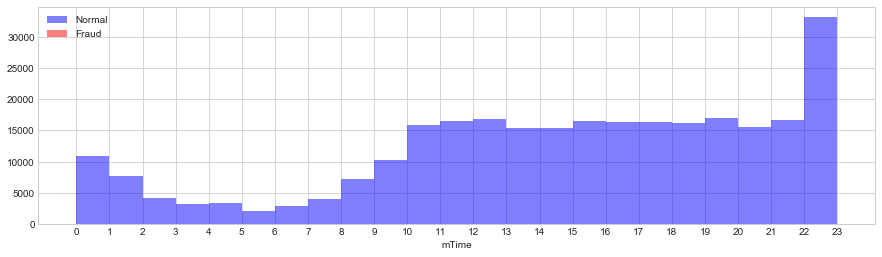

In [9]:
overlaid_histogram(data,False)

#### Visualization of  Fraud/Normal 's Transcation Amount

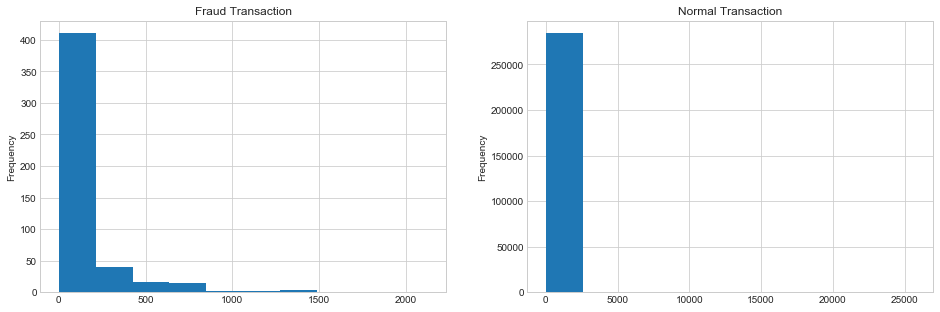

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(121)
data[data['Class']==1].Amount.plot.hist(title='Fraud Transaction');
plt.subplot(122)
data[data['Class']==0].Amount.plot.hist(title='Normal Transaction');

### Undersampling
Because the data set is imbalanced, models will be not effecient if directly using imbalance data set.<br>
Thus, here we use Undersampling technique to make training data balanced with ratio of 50:50

In [11]:
# get index for fraud and normal with same size
fraud_index  = data[data['Class']==1].index
normal_index = data[data['Class']==0].index
normal_index = np.random.choice(normal_index, len(fraud_index), replace=False)
sample_index = np.concatenate([fraud_index, normal_index])

# use index to get data set
sample_data = data.iloc[sample_index, :]

# assign X, Y
X, Y = sample_data.drop(['Class'], axis=1), sample_data['Class']

# show undersample ratio
print('Percentage of normal transcations: {:.2f}'.format(len(Y[Y==0])/len(Y)))
print('Percentage of fraud transcations: {:.2f}'.format(len(Y[Y==1])/len(Y)))
print('Total number of transactions: {}'.format(len(Y)))

Percentage of normal transcations: 0.50
Percentage of fraud transcations: 0.50
Total number of transactions: 984


### Split data
We will drop feature "Time" because it does not provide much usefulness.<br>
Data is splitted into train and testing with ratio of 8:2<br>
We will also center and scale X to make them have same scale.

In [12]:
# drop time feature
X.drop(['Time','mTime'], axis=1, inplace=True)

# split into train and test set
x, x_test, y, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# fit and transform x, and transform x_test using standardscaler
scaler = StandardScaler()
temp_x = scaler.fit_transform(x.values)
x = pd.DataFrame(temp_x, index=x.index, columns=x.columns)
temp_x_test = scaler.transform(x_test.values)
x_test = pd.DataFrame(temp_x_test, index=x_test.index, columns=x_test.columns)

### T-SNE visualization
T-SNE is a common and useful technique to visualize high-dimension data, we will use it here to help us understanding the data.

#### Before cleaning the data
Here we see before we clean the data, some are seperatable, some are mixed with normal transactions.

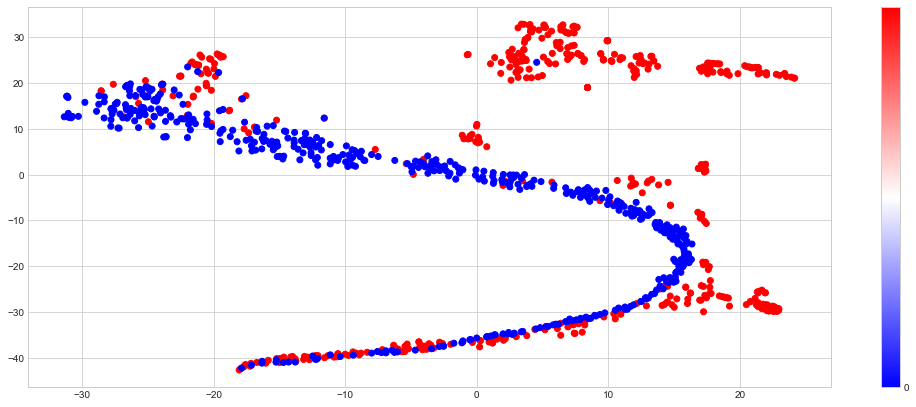

In [13]:
tsne = TSNE(perplexity=40).fit_transform(X.values)

plt.figure(figsize=(18,7))
plt.scatter(tsne[:,0], tsne[:,1], c=Y.values, cmap='bwr')
plt.colorbar(ticks=range(1))
plt.show()

#### After cleaning the data
After cleaning the data, it is better seperated by 2 classes. Even though there are some red dots mixed in blue area, it is understandable since these frauds are really difficult to detect as they are pretty much just like the normal transactions.<br>
However, it graph shows after cleaning the data, the data now has better shape to be seperated.

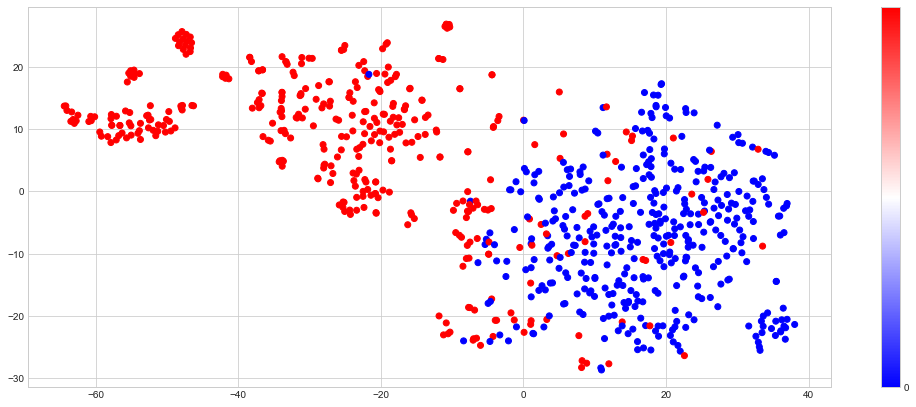

In [14]:
tsne = TSNE(perplexity=30).fit_transform(x.values)

plt.figure(figsize=(18,7))
plt.scatter(tsne[:,0], tsne[:,1], c=y.values, cmap='bwr')
plt.colorbar(ticks=range(1))
plt.show()

<a id='Part 1: Simple classification with different models'></a>

# 2. Part 1: Simple classification  with different models
[Back to top](#top)

### Build model
Define a function using GridSearchCV for future model training.

In [15]:
def model_search(x, x_test, y, y_test, clf, param):
    # build model
    model = GridSearchCV(clf, param, cv=5, scoring=['precision', 'recall', 'roc_auc'], refit='recall')
    model.fit(x,y)
    
    print('Cross-Validation training model with different parameters\n')
    # plot
    plt.figure(1,figsize=(16,6))
    plt.plot(list(param.values())[0], model.cv_results_['mean_test_precision'], 'bo-', linewidth=1, label='mean_cv_precision')
    plt.plot(list(param.values())[0], model.cv_results_['mean_test_recall'], 'ro-', linewidth=1, label='mean_cv_recall')
#     plt.plot(list(param.values())[0], model.cv_results_['mean_test_roc_auc'], 'yH-', linewidth=1, label='mean_test_roc_auc')
    plt.plot(list(param.values())[0], model.cv_results_['mean_train_precision'], 'bo:', linewidth=1, label='mean_train_precision')
    plt.plot(list(param.values())[0], model.cv_results_['mean_train_recall'], 'ro:', linewidth=1, label='mean_train_recall')
#     plt.plot(list(param.values())[0], model.cv_results_['mean_train_roc_auc'], 'yo-.', linewidth=1, label='mean_train_roc_auc')
    plt.legend(loc='center right', fontsize=12)
    plt.title(clf.__class__.__name__)
    plt.xlabel('Parameter')
    plt.show()
    print( 'The best parameter based on Recall score is: ', model.best_params_)
    print('\n\n')
    
    print('Apply the model with the best performant parameter to predict test set\n')
    # matrix stats
    print('Confusion Matrix Scores:')
    print(classification_report(y_test, model.predict(x_test), target_names=['Normal', 'Fraud']))
    print('\n\n')
    
    # confusion matrix
    plt.figure(2,figsize=(16,8))
    plt.subplot(2,2,1)
    sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), cmap='Blues', annot=True, linewidth=0.5)
    sns.set(font_scale=1)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # roc curve
    y_pred_score = model.fit(x, y).predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)
    roc_auc = auc(fpr, tpr)
    plt.subplot(2,2,2)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'darkorange', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],'navy', lw=2, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## 2.a) KNN model

The first line graph is the learning curve based on different values of parameter.<br>
And choosing the best parater to predict test set showing confusion matrix, confusion mtatrix scores and ROC curve.<br>
In model building, we use 5-fold cross validation.<br>
The blue dot-line indicates mean of training precision score.<br>
The blue line indicates mean of testing precision score.<br>
The red dot-line indicates mean of training recall score.<br>
The red line indicates mean of testing recall score.

Cross-Validation training model with different parameters



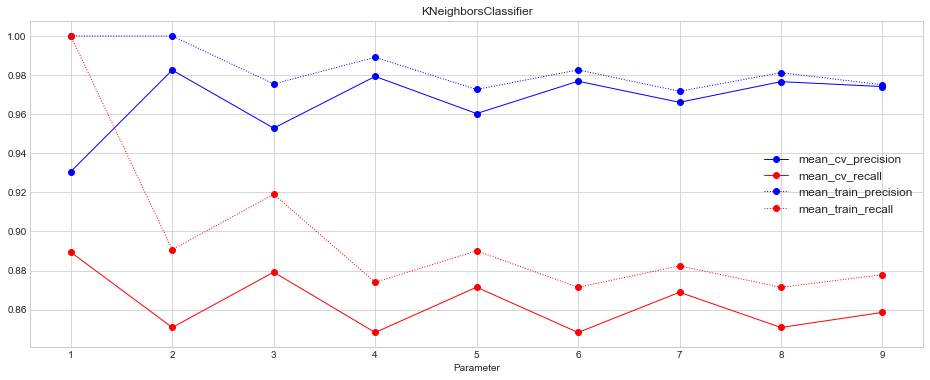

The best parameter based on Recall score is:  {'n_neighbors': 1}



Apply the model with the best performant parameter to predict test set

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.92      0.95      0.93        94
      Fraud       0.95      0.92      0.94       103

avg / total       0.93      0.93      0.93       197






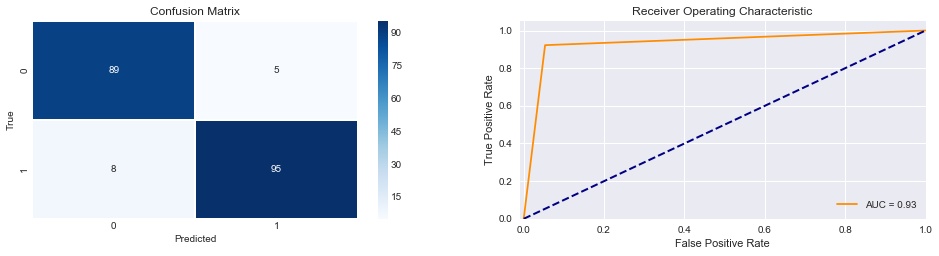

In [16]:
param = {'n_neighbors': range(1,10)}
knn = KNeighborsClassifier()

model_search(x, x_test, y, y_test, knn, param)

## 2.b) Logistic regression

Cross-Validation training model with different parameters



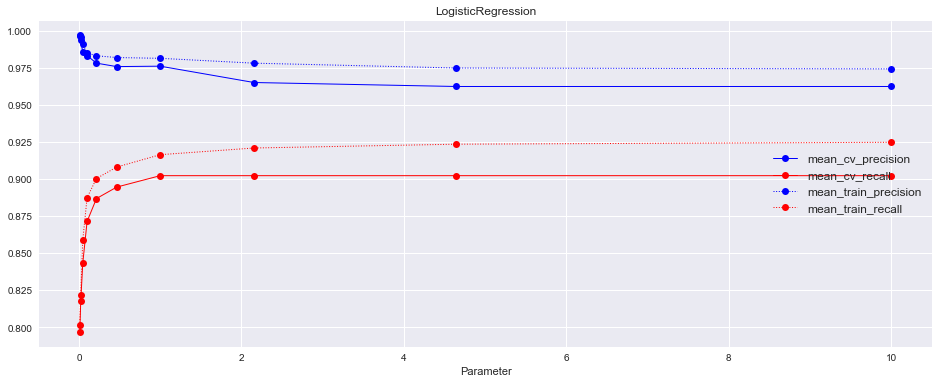

The best parameter based on Recall score is:  {'C': 1.0}



Apply the model with the best performant parameter to predict test set

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.91      0.99      0.95        94
      Fraud       0.99      0.91      0.95       103

avg / total       0.95      0.95      0.95       197






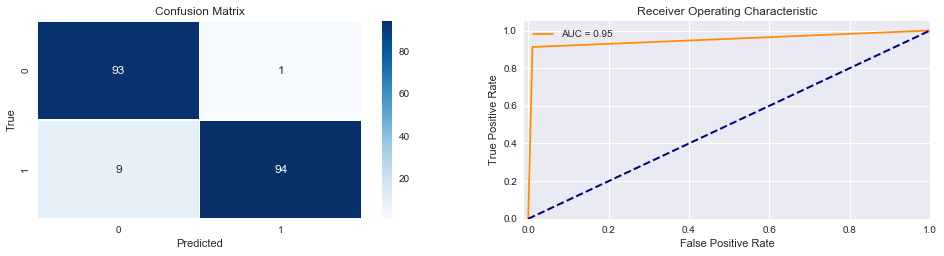

In [17]:
param = {'C': np.logspace(-2,1,10)}
logist = LogisticRegression(random_state=3)

model_search(x, x_test, y, y_test, logist, param)

## 2.c) SVC
### SVC with RBF

Cross-Validation training model with different parameters



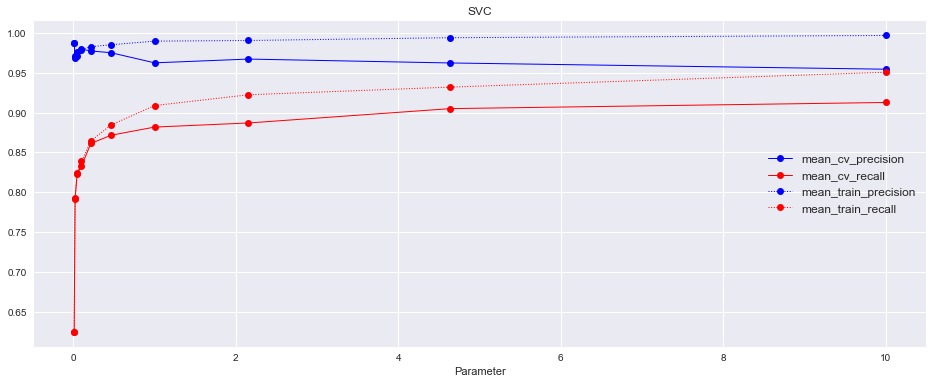

The best parameter based on Recall score is:  {'C': 10.0, 'kernel': 'rbf'}



Apply the model with the best performant parameter to predict test set

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.90      0.98      0.94        94
      Fraud       0.98      0.90      0.94       103

avg / total       0.94      0.94      0.94       197






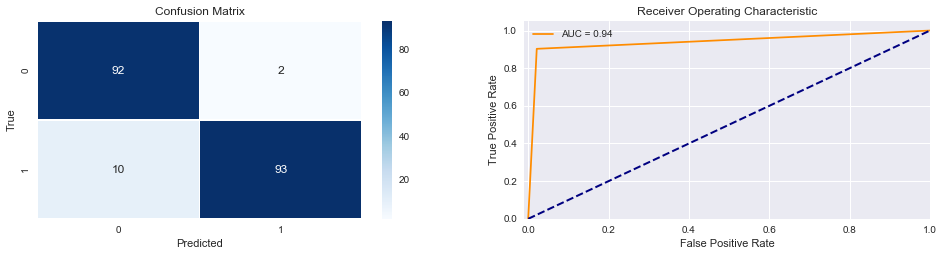

In [18]:
param = {'C': np.logspace(-2,1,10), 'kernel':['rbf']}
svc = SVC(random_state=3)

model_search(x, x_test, y, y_test, svc, param)

### SVC with Linear

Cross-Validation training model with different parameters



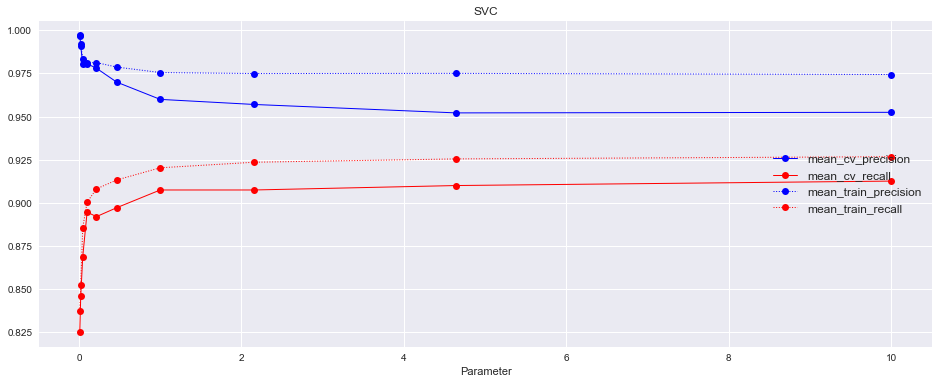

The best parameter based on Recall score is:  {'C': 10.0, 'kernel': 'linear'}



Apply the model with the best performant parameter to predict test set

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.91      0.97      0.94        94
      Fraud       0.97      0.91      0.94       103

avg / total       0.94      0.94      0.94       197






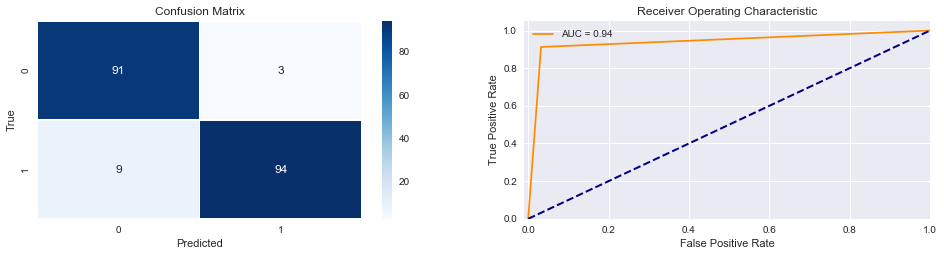

In [19]:
param = {'C': np.logspace(-2,1,10), 'kernel':['linear']}
svc = SVC(random_state=3)

model_search(x, x_test, y, y_test, svc, param)

## 2.d) Decision tree

#### Even though here the best parameter is 8, we will chosse 11. Because after max_depth 10, the model stablized.

Cross-Validation training model with different parameters



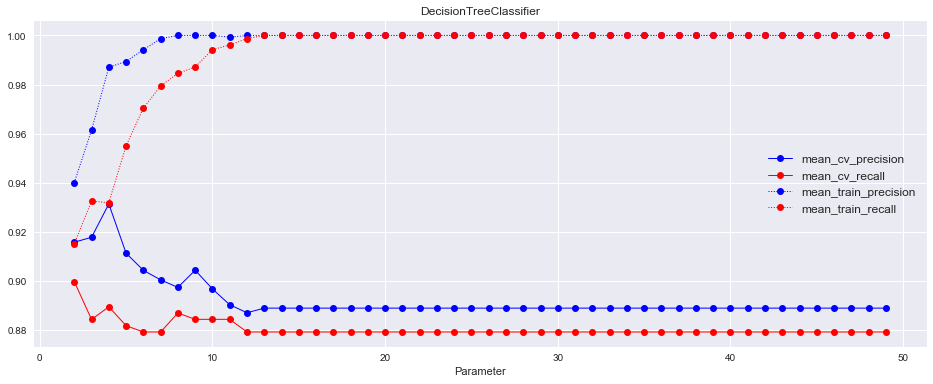

The best parameter based on Recall score is:  {'max_depth': 2}



Apply the model with the best performant parameter to predict test set

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.91      0.91      0.91        94
      Fraud       0.92      0.92      0.92       103

avg / total       0.92      0.92      0.92       197






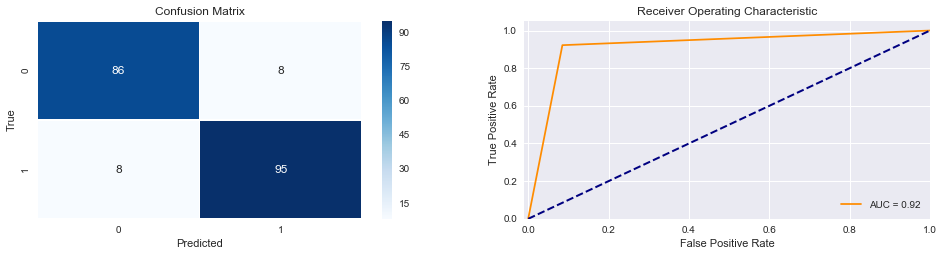

In [20]:
param = {'max_depth': list(range(2,50))}
tree= DecisionTreeClassifier(random_state=3)

model_search(x, x_test, y, y_test, tree, param)

## 2.e) Naive Bayes
### Multinomial Naive Bayes

Cross-Validation training model with different parameters



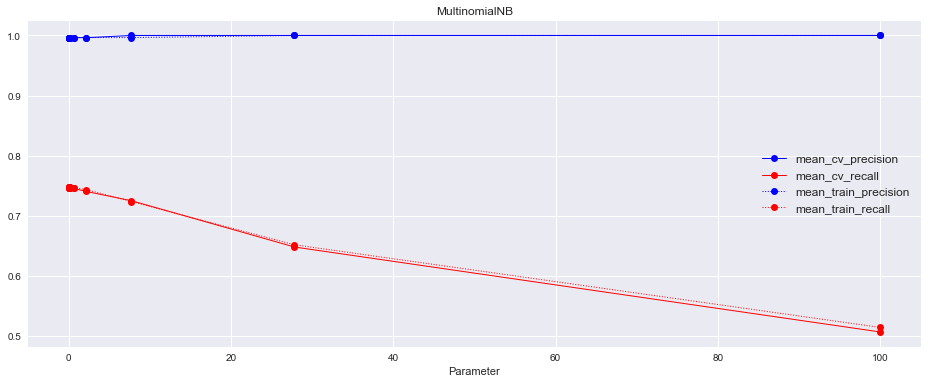

The best parameter based on Recall score is:  {'alpha': 0.001}



Apply the model with the best performant parameter to predict test set

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.82      1.00      0.90        94
      Fraud       1.00      0.81      0.89       103

avg / total       0.92      0.90      0.90       197






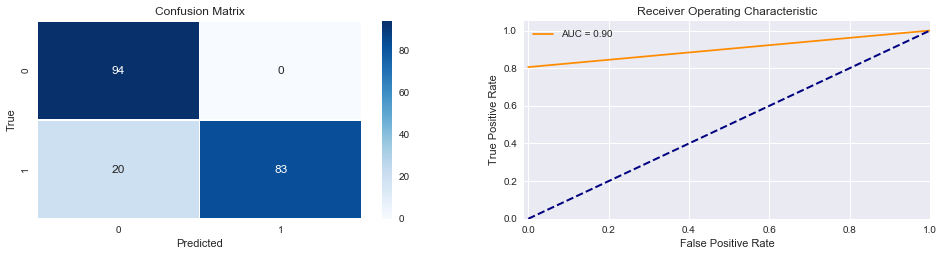

In [21]:
scale = MinMaxScaler()
temp_x = scale.fit_transform(x.values)
x_trans = pd.DataFrame(temp_x, index=x.index, columns=x.columns)
temp_xtest = scale.transform(x_test.values)
x_test_trans = pd.DataFrame(temp_xtest, index=x_test.index, columns=x_test.columns)

param = {'alpha': np.logspace(-3,2,10)}
bayes = MultinomialNB()

model_search(x_trans, x_test_trans, y, y_test, bayes, param)

### Gaussian Naive Bayes

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.88      0.97      0.92        94
      Fraud       0.97      0.88      0.92       103

avg / total       0.93      0.92      0.92       197




Apply the best parameter to the test set and the result is:




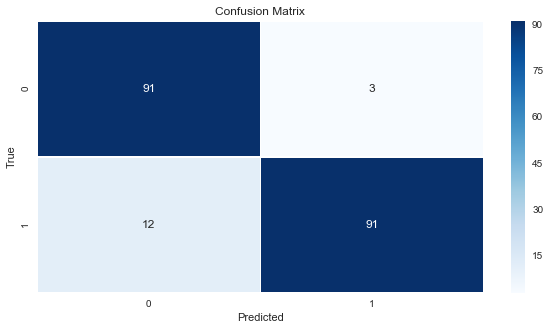

In [22]:
gnb = GaussianNB()
gnb.fit(x,y)

# matrix stats
print('Confusion Matrix Scores:')
print(classification_report(y_test, gnb.predict(x_test), target_names=['Normal', 'Fraud']))
print('\n\n')

# confusion matrix
print('Apply the best parameter to the test set and the result is:')
plt.figure(1,figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, gnb.predict(x_test)), cmap='Blues', annot=True, linewidth=0.5)
sns.set(font_scale=1)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print('\n')

## 2.f) Random Forest

Cross-Validation training model with different parameters



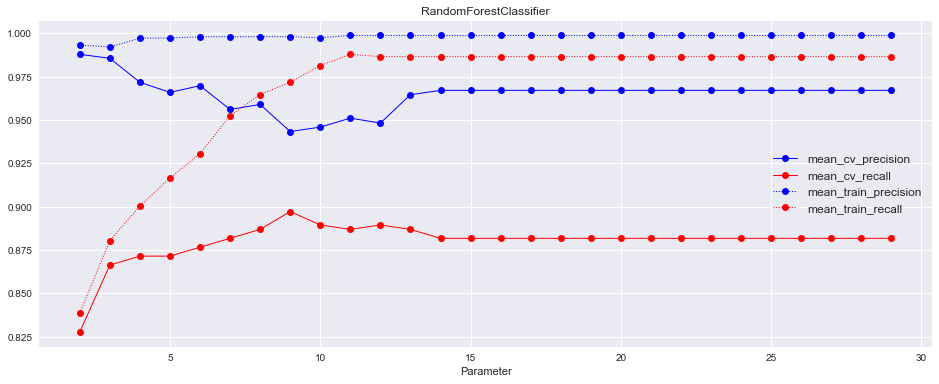

The best parameter based on Recall score is:  {'max_depth': 9}



Apply the model with the best performant parameter to predict test set

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.89      0.98      0.93        94
      Fraud       0.98      0.89      0.93       103

avg / total       0.94      0.93      0.93       197






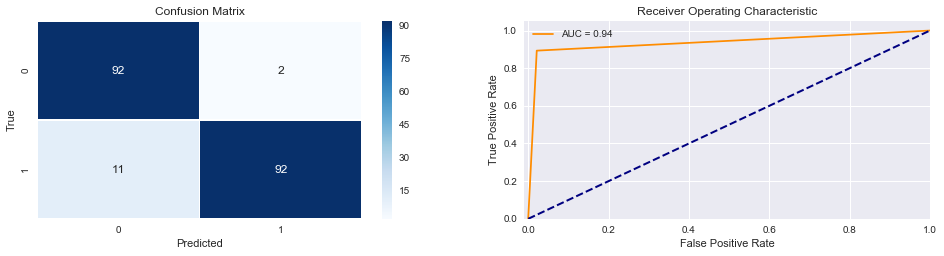

In [23]:
# param = {'min_samples_split': list(range(2,40))}
# param = {'max_depth': list(range(2,30))}
param = {'max_depth': range(2,30)}
rf = RandomForestClassifier(random_state=3)

model_search(x, x_test, y, y_test, rf, param)

<a id='Part 2: Evaluation by different evaluation techniques'></a>

# 3. Part 2: Evaluation by different evaluation techniques
[Back to top](#top)

In this project, we measure the accuracy by recall and precision scores. If we simply measure the overall accuracy, it lost its information of predicting fraud accuracy.<br>
The overall accuracy would be 99.85% if we simply predict all labels to be 0 which is not we intend to do.<br>
The most important accuracy is recall score and followed by precision. Recall measure the performance of **TYPE 2** error. We want to high recall socre so that we miss as few as possible fraud transactions.<br>
The second we measure is precision which is **TYPE 1** error. It will send customers fraud alters for their normal transactions. We also want to this score high so we can minimize wrongful alters.

The best recall score we have from above models are Logistic Regression, both SVC, Decision Tree and Random Forest. They all have same recall score of 91%.<br>
Next, we examine precision socre. Both SVC algorithms provide same high precision score of 98% while keep high recall score.<br>
Thus, in this round, the SVC models are the best one to pick. It firstly use cross-validation to select the best parameter and apply to test set, which make its score convincible.

<a id='Part 3: Ensemble, Baggaing and Pasting'></a>

# 4. Part 3: Ensemble, Baggaing and Pasting
[Back to top](#top)

## 4.a) Ensemble

### hard voting using previously tuned parameters
USing 5 models with previously the best parameters found.<br>
Decision Tree, SVC (rbf), Logistic Regression, Random Forest, K-NN

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.91      0.99      0.95        94
      Fraud       0.99      0.91      0.95       103

avg / total       0.95      0.95      0.95       197




Apply the best parameter to the test set and the result is:




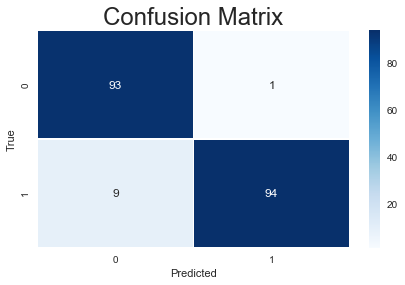

In [24]:
# x, x_test, y, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

clf1 = DecisionTreeClassifier(max_depth=11, random_state=3)
clf2 = SVC(C=4.64, probability=True, kernel='rbf', random_state=3)
clf3 = LogisticRegression(C=10, random_state=3)
clf4 = RandomForestClassifier(max_depth=9, random_state=3)
clf5 = KNeighborsClassifier(n_neighbors=1)
clf6 = GaussianNB()

hardvote = VotingClassifier(estimators=[('dt',clf1),('scv',clf2),('lr',clf3),('rf', clf4),('knn',clf5)],
                            voting='hard')
hardvote.fit(x, y)

# matrix stats
print('Confusion Matrix Scores:')
print(classification_report(y_test, hardvote.predict(x_test), target_names=['Normal', 'Fraud']))
print('\n\n')

# confusion matrix
print('Apply the best parameter to the test set and the result is:')
plt.figure(1,figsize=(7,4))
sns.heatmap(confusion_matrix(y_test, hardvote.predict(x_test)), cmap='Blues', annot=True, linewidth=0.5)
sns.set(font_scale=2.0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print('\n')

### Result
Using ensemble mothod combining 5 models to see if it could improve performance.<br>
The result shows that it imporve precision to 99% while the recall score is same, which is not bad.<br>

### hard voting using untuned parameters
Now just see what happens if we use untuned parameters

Individual classifier performance:
------------------------------------------------------------------------------
DecisionTreeClassifier
[[82 12]
 [ 8 95]]
Recall score is: 0.922330097087 

SVC
[[93  1]
 [ 9 94]]
Recall score is: 0.912621359223 

LogisticRegression
[[93  1]
 [ 9 94]]
Recall score is: 0.912621359223 

RandomForestClassifier
[[93  1]
 [10 93]]
Recall score is: 0.902912621359 

KNeighborsClassifier
[[91  3]
 [12 91]]
Recall score is: 0.883495145631 


Using hard voting ensemble
------------------------------------------------------------------------------
Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.91      0.99      0.95        94
      Fraud       0.99      0.91      0.95       103

avg / total       0.95      0.95      0.95       197




Apply the best parameter to the test set and the result is:




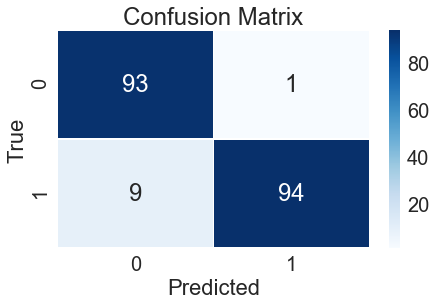

In [25]:
# x, x_test, y, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

cf1 = DecisionTreeClassifier(random_state=3)
cf2 = SVC(random_state=3)
cf3 = LogisticRegression(random_state=3)
cf4 = RandomForestClassifier(random_state=3)
cf5 = KNeighborsClassifier()

print('Individual classifier performance:')
print('------------------------------------------------------------------------------')
for clf in [cf1, cf2, cf3, cf4, cf5]:
    clf.fit(x, y)
    print(clf.__class__.__name__)
    print(confusion_matrix(y_test, clf.predict(x_test)))
    print('Recall score is:', recall_score(y_test, clf.predict(x_test)), '\n')

hardvote = VotingClassifier(estimators=[('dt', clf1), ('scv', clf2), ('lr', clf3), ('rf', clf4), ('knn', clf5)],
                            voting='hard')
hardvote.fit(x, y)

print('\nUsing hard voting ensemble')
print('------------------------------------------------------------------------------')
# matrix stats
print('Confusion Matrix Scores:')
print(classification_report(y_test, hardvote.predict(x_test), target_names=['Normal', 'Fraud']))
print('\n\n')

# confusion matrix
print('Apply the best parameter to the test set and the result is:')
plt.figure(1,figsize=(7,4))
sns.heatmap(confusion_matrix(y_test, hardvote.predict(x_test)), cmap='Blues', annot=True, linewidth=0.5)
sns.set(font_scale=2.0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print('\n')

### Result
First, we see each individual model with untuned parameter has recall score with low of 87% and high of 91%.<br>
Combining them together, we see that recall is 91% and precision is 99% which is very good comparing them to each individual model. We see the ensemble method improves performance.<br>
This ensemble model is actually slightly better than the previous tuned parameters model. This may be because strong estimator does work well when combining them together. On the other hand, combining week estimatos seriously improve performance.

### soft voting using tuned parameters

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.91      0.97      0.94        94
      Fraud       0.97      0.91      0.94       103

avg / total       0.94      0.94      0.94       197




Apply the best parameter to the test set and the result is:




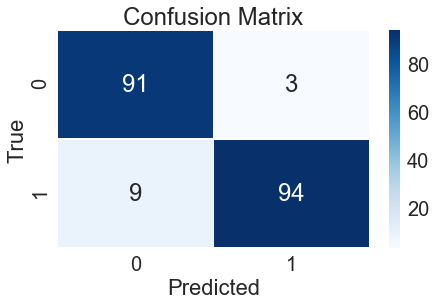

In [26]:
hardvote = VotingClassifier(estimators=[('dt',clf1),('scv',clf2),('lr',clf3),('rf', clf4),('knn',clf5)],
                            voting='soft')
hardvote.fit(x, y)

# matrix stats
print('Confusion Matrix Scores:')
print(classification_report(y_test, hardvote.predict(x_test), target_names=['Normal', 'Fraud']))
print('\n\n')

# confusion matrix
print('Apply the best parameter to the test set and the result is:')
plt.figure(1,figsize=(7,4))
sns.heatmap(confusion_matrix(y_test, hardvote.predict(x_test)), cmap='Blues', annot=True, linewidth=0.5)
sns.set(font_scale=2.0)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print('\n')

### Result
Here we try soft voting method for preditions. It turns out better than the harding voting method.

## 4.b) Bagging
Bagging is a technique to sampling training set with replacement. Most of time, the bagging method extract only 67% observations of the total. The rest of 32% will never appear in training which could left to be the testing set.

Here we use 6 algorithms using Bagging method to train the model and using the test set to see its final performance.<br>
Decision Tree, SVC (rbf), Logistic Regression, Random Forest, K-NN, Gussian Naive Bayes

------------------------------------------------------------------------------
Using classfier  DecisionTreeClassifier :

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.91      0.99      0.95        94
      Fraud       0.99      0.91      0.95       103

avg / total       0.95      0.95      0.95       197



Apply the best parameter to the test set and the result is:


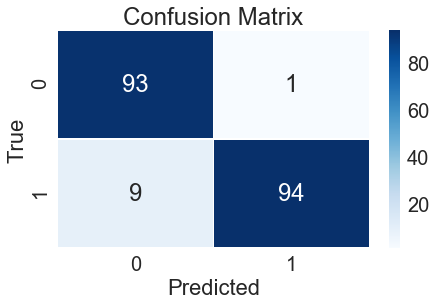

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



------------------------------------------------------------------------------
Using classfier  SVC :

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.91      0.98      0.94        94
      Fraud       0.98      0.91      0.94       103

avg / total       0.95      0.94      0.94       197



Apply the best parameter to the test set and the result is:


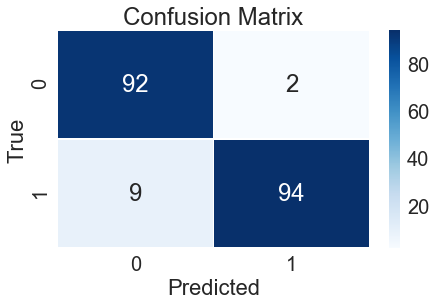

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



------------------------------------------------------------------------------
Using classfier  LogisticRegression :

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.91      0.98      0.94        94
      Fraud       0.98      0.91      0.94       103

avg / total       0.95      0.94      0.94       197



Apply the best parameter to the test set and the result is:


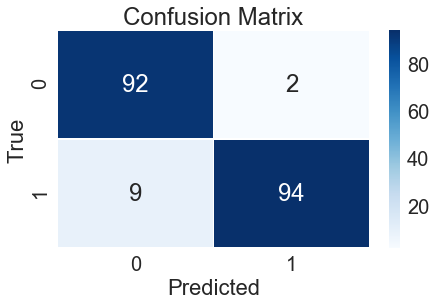

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



------------------------------------------------------------------------------
Using classfier  RandomForestClassifier :

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.91      1.00      0.95        94
      Fraud       1.00      0.91      0.95       103

avg / total       0.96      0.95      0.95       197



Apply the best parameter to the test set and the result is:


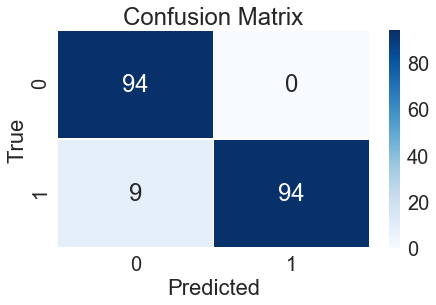

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



------------------------------------------------------------------------------
Using classfier  KNeighborsClassifier :

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.92      0.96      0.94        94
      Fraud       0.96      0.92      0.94       103

avg / total       0.94      0.94      0.94       197



Apply the best parameter to the test set and the result is:


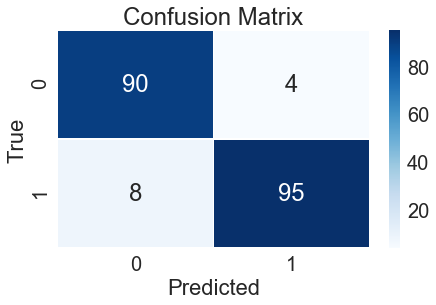

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



------------------------------------------------------------------------------
Using classfier  GaussianNB :

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.88      0.97      0.92        94
      Fraud       0.97      0.88      0.92       103

avg / total       0.93      0.92      0.92       197



Apply the best parameter to the test set and the result is:


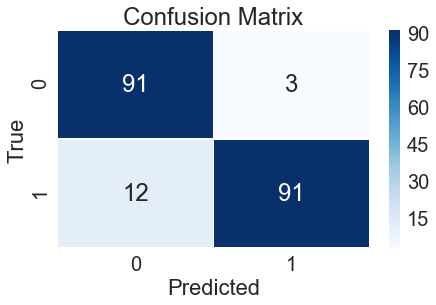

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^





In [27]:
for clf in [clf1, clf2, clf3, clf4, clf5, gnb]:
    print('------------------------------------------------------------------------------')
    print( R+'Using classfier ', clf.__class__.__name__, ':\n')
    bag = BaggingClassifier(base_estimator = clf, n_estimators=50, max_samples=0.8, oob_score=True)
    bag.fit(x, y)

    # matrix stats
    print('Confusion Matrix Scores:')
    print(classification_report(y_test, bag.predict(x_test), target_names=['Normal', 'Fraud']))
    print('\n')

    # confusion matrix
    print('Apply the best parameter to the test set and the result is:')
    plt.figure(figsize=(7,4))
    sns.heatmap(confusion_matrix(y_test, bag.predict(x_test)), cmap='Blues', annot=True, linewidth=0.5)
    sns.set(font_scale=2.0)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
    print('\n\n')

### Result
The best model here is Logistic Regression with recall of 92% and precision of 99%.

## 4.c) Pasting
[Back to top](#top)<br>
Pating is same as Bagging but the sampling is without replacement.

------------------------------------------------------------------------------
Using classfier DecisionTreeClassifier :

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.90      0.97      0.93        94
      Fraud       0.97      0.90      0.93       103

avg / total       0.94      0.93      0.93       197



Apply the best parameter to the test set and the result is:


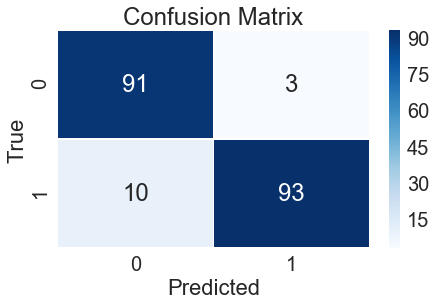

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



------------------------------------------------------------------------------
Using classfier SVC :

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.91      0.99      0.95        94
      Fraud       0.99      0.91      0.95       103

avg / total       0.95      0.95      0.95       197



Apply the best parameter to the test set and the result is:


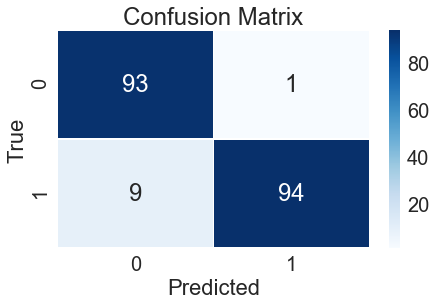

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



------------------------------------------------------------------------------
Using classfier LogisticRegression :

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.91      0.98      0.94        94
      Fraud       0.98      0.91      0.94       103

avg / total       0.95      0.94      0.94       197



Apply the best parameter to the test set and the result is:


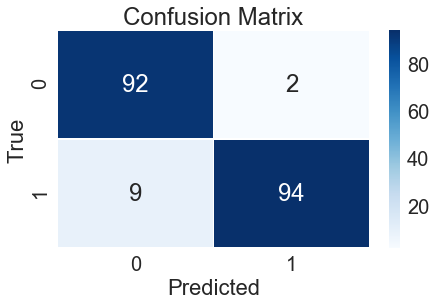

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



------------------------------------------------------------------------------
Using classfier RandomForestClassifier :

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.91      1.00      0.95        94
      Fraud       1.00      0.91      0.95       103

avg / total       0.96      0.95      0.95       197



Apply the best parameter to the test set and the result is:


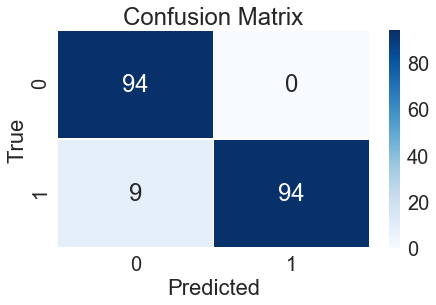

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



------------------------------------------------------------------------------
Using classfier KNeighborsClassifier :

Confusion Matrix Scores:
             precision    recall  f1-score   support

     Normal       0.91      0.97      0.94        94
      Fraud       0.97      0.91      0.94       103

avg / total       0.94      0.94      0.94       197



Apply the best parameter to the test set and the result is:


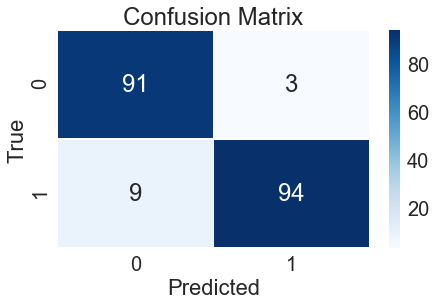

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^





In [28]:
for clf in [clf1, clf2, clf3, clf4, clf5]:
    print('------------------------------------------------------------------------------')
    print('Using classfier', clf.__class__.__name__, ':\n')
    bag = BaggingClassifier(base_estimator = clf, bootstrap=False, max_features=0.8, n_estimators=20)
    bag.fit(x, y)

    # matrix stats
    print('Confusion Matrix Scores:')
    print(classification_report(y_test, bag.predict(x_test), target_names=['Normal', 'Fraud']))
    print('\n')

    # confusion matrix
    print('Apply the best parameter to the test set and the result is:')
    plt.figure(figsize=(7,4))
    sns.heatmap(confusion_matrix(y_test, bag.predict(x_test)), cmap='Blues', annot=True, linewidth=0.5)
    sns.set(font_scale=2.0)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print('^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^')
    print('\n\n')

### Result
The best performed model is Decision Tree and Random Forest with recall of 92% and precision of 99%.

<a id='Part 4: Boosting'></a>

# 5. Part 4:  Boosting
[Back to top](#top)

## 5.a) Adaboosting
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

Here we use 3 different estimators applying to Adaboosting with different learning rates.

###################################################################################################################
Using classifier ***** DecisionTreeClassifier *****
--------------------------------------------------------------------
For learning rate is 0.01
[[91  3]
 [11 92]]
Recall score is 0.893203883495 

--------------------------------------------------------------------
For learning rate is 0.1
[[93  1]
 [ 9 94]]
Recall score is 0.912621359223 

--------------------------------------------------------------------
For learning rate is 0.2
[[93  1]
 [ 9 94]]
Recall score is 0.912621359223 

--------------------------------------------------------------------
For learning rate is 0.5
[[90  4]
 [ 8 95]]
Recall score is 0.922330097087 

--------------------------------------------------------------------
For learning rate is 1
[[87  7]
 [ 8 95]]
Recall score is 0.922330097087 

--------------------------------------------------------------------
For learning rate is 2
[[17 77]
 [

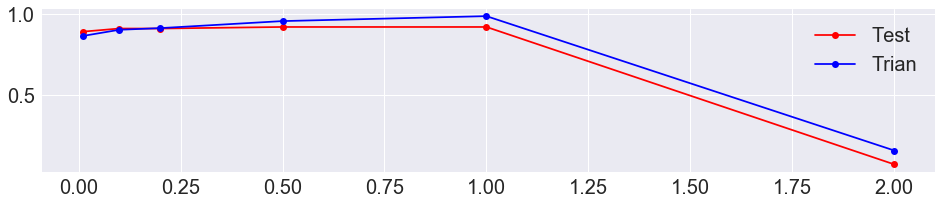

###################################################################################################################
Using classifier ***** LogisticRegression *****
--------------------------------------------------------------------
For learning rate is 0.01
[[94  0]
 [11 92]]
Recall score is 0.893203883495 

--------------------------------------------------------------------
For learning rate is 0.1
[[94  0]
 [10 93]]
Recall score is 0.902912621359 

--------------------------------------------------------------------
For learning rate is 0.2
[[93  1]
 [ 9 94]]
Recall score is 0.912621359223 

--------------------------------------------------------------------
For learning rate is 0.5
[[92  2]
 [ 9 94]]
Recall score is 0.912621359223 

--------------------------------------------------------------------
For learning rate is 1
[[91  3]
 [ 9 94]]
Recall score is 0.912621359223 

--------------------------------------------------------------------
For learning rate is 2
[[90  4]
 [ 9 9

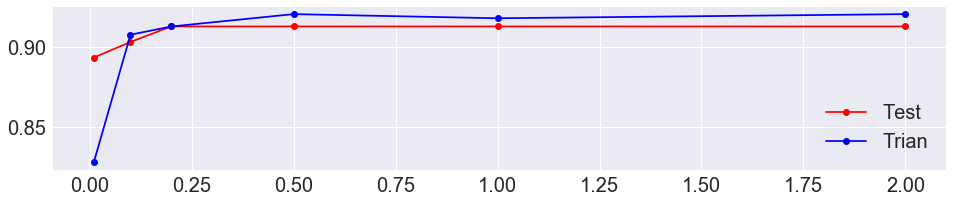

###################################################################################################################
Using classifier ***** GaussianNB *****
--------------------------------------------------------------------
For learning rate is 0.01
[[92  2]
 [10 93]]
Recall score is 0.902912621359 

--------------------------------------------------------------------
For learning rate is 0.1
[[90  4]
 [10 93]]
Recall score is 0.902912621359 

--------------------------------------------------------------------
For learning rate is 0.2
[[85  9]
 [55 48]]
Recall score is 0.466019417476 

--------------------------------------------------------------------
For learning rate is 0.5
[[63 31]
 [ 5 98]]
Recall score is 0.95145631068 

--------------------------------------------------------------------
For learning rate is 1
[[92  2]
 [85 18]]
Recall score is 0.174757281553 

--------------------------------------------------------------------
For learning rate is 2
[[ 35  59]
 [  3 100]]
R

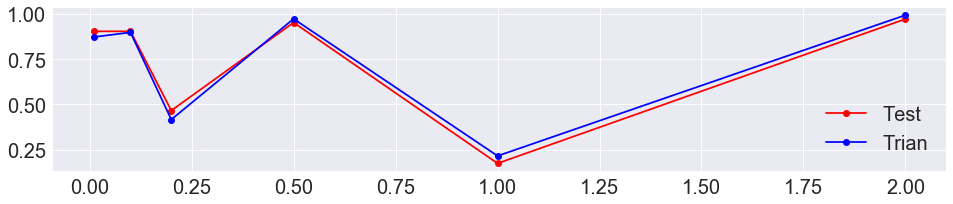

In [29]:
cla1 = DecisionTreeClassifier(max_depth=1, random_state=3)
cla2 = LogisticRegression(C=10, random_state=3)
cla3 = GaussianNB()

classify = [cla1, cla2, cla3]


for f in classify:
    rate = [0.01, 0.1, 0.2, 0.5, 1, 2]
    test_recall = []
    trai_recall = []
    print('###################################################################################################################')
    print('Using classifier *****', f.__class__.__name__, '*****')
    for i in rate:
        ada = AdaBoostClassifier(f, learning_rate=i, random_state=3)
        ada.fit(x, y)
        test_recall.append(recall_score(y_test, ada.predict(x_test)))
        trai_recall.append(recall_score(y, ada.predict(x)))
        print('--------------------------------------------------------------------')
        print('For learning rate is', i)
        print(confusion_matrix(y_test, ada.predict(x_test)))
        print('Recall score is', recall_score(y_test, ada.predict(x_test)), '\n')

    plt.figure(figsize=(16,3))
    plt.plot(rate, test_recall, 'ro-', label='Test')
    plt.plot(rate, trai_recall, 'bo-', label='Trian')
    plt.legend(loc='best')
    plt.show()

### Result
The best one is using Decision Tree with max_depth=1, learning rate=1. It has recall of 93% and precison of 100%.

## 5.b) Gradient boosting

--------------------------------------------------------------------
For learning rate is 0.01
[[92  2]
 [ 9 94]]
Recall score is 0.912621359223 

--------------------------------------------------------------------
For learning rate is 0.1
[[92  2]
 [ 8 95]]
Recall score is 0.922330097087 

--------------------------------------------------------------------
For learning rate is 0.2
[[91  3]
 [ 8 95]]
Recall score is 0.922330097087 

--------------------------------------------------------------------
For learning rate is 0.5
[[90  4]
 [ 7 96]]
Recall score is 0.932038834951 

--------------------------------------------------------------------
For learning rate is 1
[[88  6]
 [ 8 95]]
Recall score is 0.922330097087 

--------------------------------------------------------------------
For learning rate is 2
[[84 10]
 [10 93]]
Recall score is 0.902912621359 



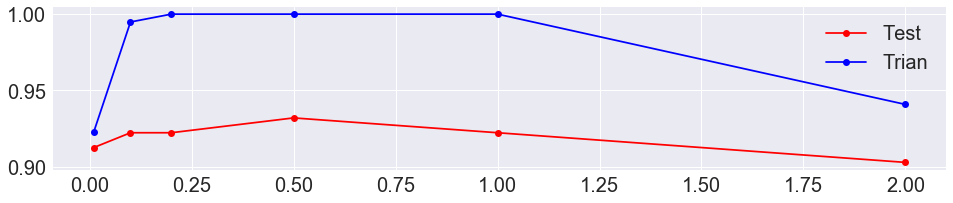

In [30]:
test_recall = []
trai_recall = []
for i in rate:
    gdboost = GradientBoostingClassifier(learning_rate=i, random_state=3)
    gdboost.fit(x, y)
    test_recall.append(recall_score(y_test, gdboost.predict(x_test)))
    trai_recall.append(recall_score(y, gdboost.predict(x)))
    print('--------------------------------------------------------------------')
    print('For learning rate is', i)
    print(confusion_matrix(y_test, gdboost.predict(x_test)))
    print('Recall score is', recall_score(y_test, gdboost.predict(x_test)), '\n')
plt.figure(figsize=(16,3))
plt.plot(rate, test_recall, 'ro-', label='Test')
plt.plot(rate, trai_recall, 'bo-', label='Trian')
plt.legend(loc='best')
plt.show()

### Result
Here the best recall is 93% and precision is 98% when learning rate equals to 1.

## 5.c) Test models using entire data
[Back to top](#top)<br>
Here is applying models to whole dataset to its performance.<br>
Even though we used all fraud transcations to build our model, the result may be not reliable. However, it is helpful to see it precision score. Additionally, some normal transcations may be similar to fraud transcations, we want to see its recall score based on this concern.

In [31]:
x_vali, y_vali = data.drop(['Time','mTime','Class'], axis=1), data['Class']
x_vali.head()

temp_vali = scaler.transform(x_vali.values)
x_vali = pd.DataFrame(temp_vali, index=x_vali.index, columns=x_vali.columns)

### Indivisual Estimator ---- Logistic Regression
The numbers in confusion matrix in graph indicate the percentage of the total observations.

Overall accuracy is 96.5770%
Recall score is 0.920732%
Confusion Matrix:
[[274605   9710]
 [    39    453]]
Apply the best parameter to the test set and the result is:


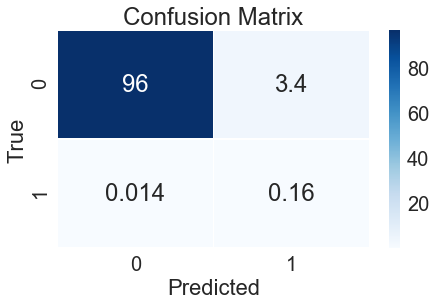

In [32]:
logi = LogisticRegression(C=4.64)
logi.fit(x, y)

print('Overall accuracy is {:.4f}%'.format(logi.score(x_vali, y_vali)*100))
print('Recall score is {:4f}%'.format(recall_score(y_vali, logi.predict(x_vali))))
print('Confusion Matrix:')
print(confusion_matrix(y_vali, logi.predict(x_vali)))

def confusion_plt(clf, x, y):
    # confusion matrix
    print('Apply the best parameter to the test set and the result is:')
    plt.figure(figsize=(7,4))
    sns.heatmap(confusion_matrix(y, clf.predict(x))/len(data['Class'])*100, cmap='Blues', annot=True, linewidth=0.5)
    sns.set(font_scale=2.0)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

confusion_plt(logi, x_vali, y_vali)

### Ensemble

Overall accuracy is 97.5085%
Recall score is 0.955285%
Confusion Matrix:
[[277241   7074]
 [    22    470]]
Apply the best parameter to the test set and the result is:


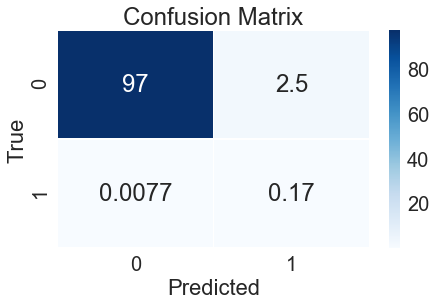

In [33]:
hardvote = VotingClassifier(estimators=[('dt', clf1), ('scv', clf2), ('lr', clf3), ('rf', clf4), ('knn', clf5)],
                            voting='hard')
hardvote.fit(x, y)

print('Overall accuracy is {:.4f}%'.format(hardvote.score(x_vali, y_vali)*100))
print('Recall score is {:4f}%'.format(recall_score(y_vali, hardvote.predict(x_vali))))
print('Confusion Matrix:')
print(confusion_matrix(y_vali, hardvote.predict(x_vali)))
confusion_plt(hardvote, x_vali, y_vali)

### Adaboost

Overall accuracy is 96.5770%
Recall score is 0.975610%
Confusion Matrix:
[[268589  15726]
 [    12    480]]
Apply the best parameter to the test set and the result is:


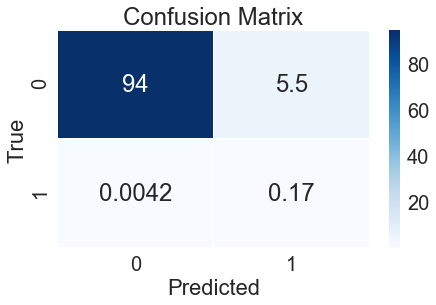

In [34]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=3), learning_rate=1, random_state=3)
ada.fit(x, y)

print('Overall accuracy is {:.4f}%'.format(logi.score(x_vali, y_vali)*100))
print('Recall score is {:4f}%'.format(recall_score(y_vali, ada.predict(x_vali))))
print('Confusion Matrix:')
print(confusion_matrix(y_vali, ada.predict(x_vali)))
confusion_plt(ada, x_vali, y_vali)

### Random Forest

Overall accuracy is 97.6454%
Recall score is 0.977642%
Confusion Matrix:
[[277620   6695]
 [    11    481]]
Apply the best parameter to the test set and the result is:


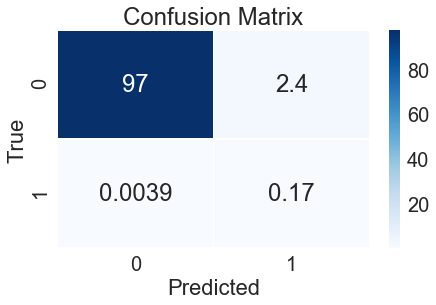

In [35]:
rf = RandomForestClassifier(max_depth=11)
past = BaggingClassifier(base_estimator = rf, bootstrap=False, n_estimators=50)
past.fit(x, y)

print('Overall accuracy is {:.4f}%'.format(past.score(x_vali, y_vali)*100))
print('Recall score is {:4f}%'.format(recall_score(y_vali, past.predict(x_vali))))
print('Confusion Matrix:')
print(confusion_matrix(y_vali, past.predict(x_vali)))
confusion_plt(past, x_vali, y_vali)

### Bagging

Overall accuracy is 96.1353%
Recall score is 0.979675%
Confusion Matrix:
[[273318  10997]
 [    10    482]]
Apply the best parameter to the test set and the result is:


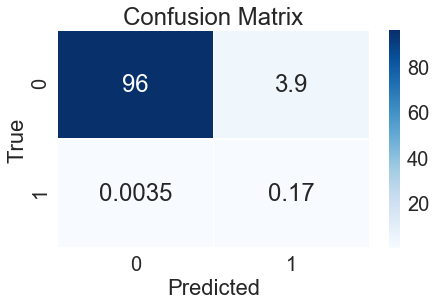

In [36]:
ccc = DecisionTreeClassifier(max_depth=11, random_state=3)
bag = BaggingClassifier(base_estimator = ccc, n_estimators=50, oob_score=True, random_state=3)
bag.fit(x, y)

print('Overall accuracy is {:.4f}%'.format(bag.score(x_vali, y_vali)*100))
print('Recall score is {:4f}%'.format(recall_score(y_vali, bag.predict(x_vali))))
print('Confusion Matrix:')
print(confusion_matrix(y_vali, bag.predict(x_vali)))
confusion_plt(bag, x_vali, y_vali)

### Gradient Boosting

Overall accuracy is 96.3010%
Recall score is 0.983740%
Confusion Matrix:
[[273788  10527]
 [     8    484]]
Apply the best parameter to the test set and the result is:


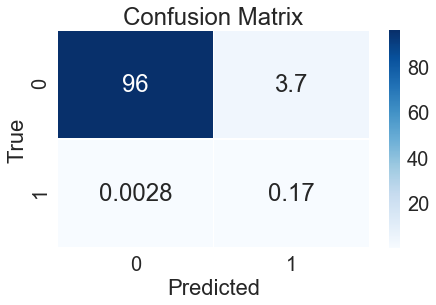

In [37]:
gdboost = GradientBoostingClassifier(learning_rate=0.2, random_state=3)
gdboost.fit(x, y)

print('Overall accuracy is {:.4f}%'.format(gdboost.score(x_vali, y_vali)*100))
print('Recall score is {:4f}%'.format(recall_score(y_vali, gdboost.predict(x_vali))))
print('Confusion Matrix:')
print(confusion_matrix(y_vali, gdboost.predict(x_vali)))
confusion_plt(gdboost, x_vali, y_vali)

### Result
We see there the Gradient Boosting has the best recall score of 98%. The random forest has a bit lower score but with a higher precision score.<br>
There is a trade-off between recall and precision, so it has to choose wheather to strictly persue recall score or with some balance of precision.

<a id='Part 5: PCA'></a>

# 6. Part 5: Dimension Reduction and Feature select
[Back to top](#top)



In this part, we will use Principal Component Analysis(PCA) to reduce dataset dimensions. Then we will select feature by Recursive feature elimination (RFE), Recursive feature elimination with cross validation (RFECV) and Tree-based feature selection methods.

## 6.a) Correlation heatmap
We could see correlations between variables.

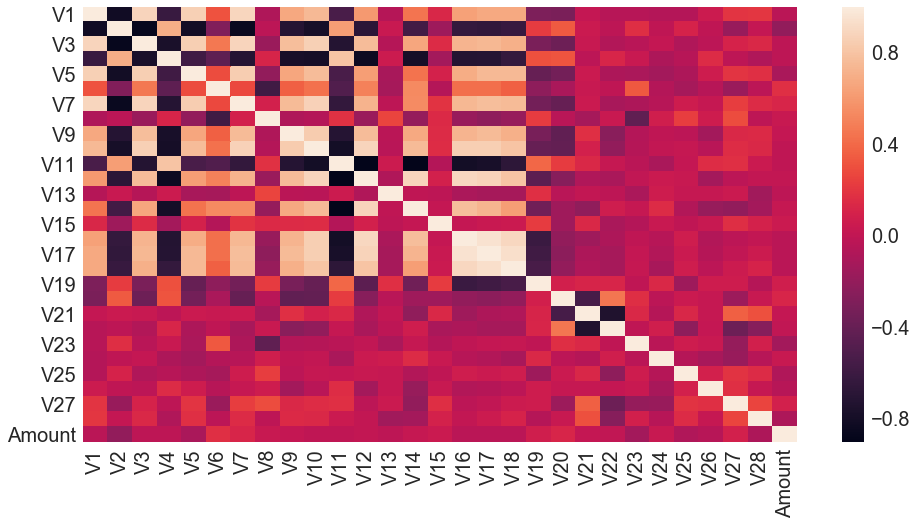

In [38]:
corr = X.corr()
plt.figure(1, figsize=(16,8))
sns.heatmap(corr)
sns.set(font_scale=1)
plt.show()

## 6.b) PCA
### The accuracy score before reducing dimensional

In [39]:
clf1 = DecisionTreeClassifier(max_depth=11, random_state=3)
clf2 = SVC(C=4.64, probability=True, kernel='linear', random_state=3)
clf3 = LogisticRegression(C=10, random_state=3)
clf4 = RandomForestClassifier(max_depth=11, random_state=3)
clf5 = KNeighborsClassifier(n_neighbors=1)
clf6 = GaussianNB()

model_score=[]
model_name =[]
reca1 = []
for clf in [clf1, clf2, clf3, clf4, clf5]:
    model = clf
    model.fit(x,y)
    model_name.append(clf.__class__.__name__)
    model_score.append(accuracy_score(y_test,clf.predict(x_test)))
    reca1.append(recall_score(y_test, clf.predict(x_test)))
    print('------------------------------------------------------------------------------')
    print('Using classfier', clf.__class__.__name__, ':\n')
    print('Accuracy score is:', accuracy_score(y_test, clf.predict(x_test)))    
    print('Recall score is:', recall_score(y_test, clf.predict(x_test)), '\n')

------------------------------------------------------------------------------
Using classfier DecisionTreeClassifier :

Accuracy score is: 0.893401015228
Recall score is: 0.893203883495 

------------------------------------------------------------------------------
Using classfier SVC :

Accuracy score is: 0.939086294416
Recall score is: 0.912621359223 

------------------------------------------------------------------------------
Using classfier LogisticRegression :

Accuracy score is: 0.944162436548
Recall score is: 0.912621359223 

------------------------------------------------------------------------------
Using classfier RandomForestClassifier :

Accuracy score is: 0.939086294416
Recall score is: 0.902912621359 

------------------------------------------------------------------------------
Using classfier KNeighborsClassifier :

Accuracy score is: 0.934010152284
Recall score is: 0.922330097087 



##### Reducing the dataset's dimensionality with an explained variance ratio of 95%.

In [40]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x)
x_test_reduced = pca.transform(x_test)

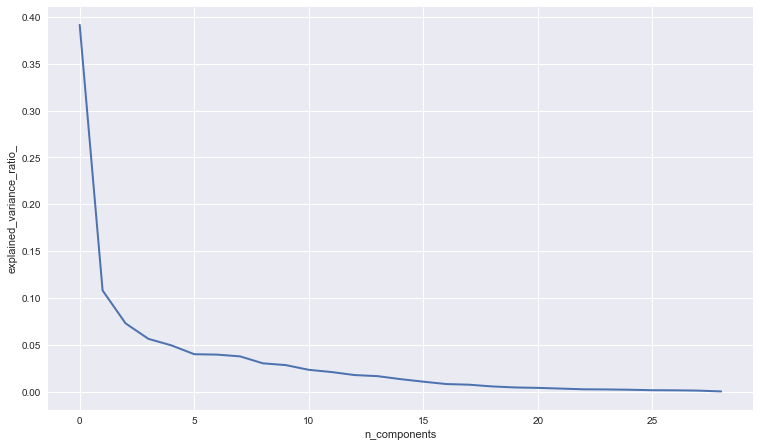

[ 0.39152746  0.1079814   0.07294863  0.05632773  0.04940177  0.03995533
  0.0395031   0.03763681  0.0302104   0.02830734  0.02328134  0.02089894
  0.01768205  0.01652925  0.01335012  0.01062874]
To keep explained variance ratio of 95%, we need to keep 16 principal components


In [41]:
pca=PCA()
pca.fit(x)
plt.figure(1, figsize=(14, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2);
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')
plt.show()

pca = PCA(n_components= 0.95)
pca.fit(x)
print(pca.explained_variance_ratio_)
print('To keep explained variance ratio of 95%, we need to keep {} principal components'.format(pca.n_components_))

### The accuracy score After reducing dimensional

In [42]:
rnd_model_score=[]
reca2 = []
for clf in [clf1, clf2, clf3, clf4, clf5]:
    rnd_model = clf
    rnd_model.fit(x_reduced,y)
    rnd_model_score.append(accuracy_score(y_test,clf.predict(x_test_reduced)))
    reca2.append(recall_score(y_test, clf.predict(x_test_reduced)))
    print('------------------------------------------------------------------------------')
    print('Using classfier', clf.__class__.__name__, ':\n')
    print('Accuracy score is:', accuracy_score(y_test, clf.predict(x_test_reduced)))
    print('Recall score is:', recall_score(y_test, clf.predict(x_test_reduced)), '\n')

------------------------------------------------------------------------------
Using classfier DecisionTreeClassifier :

Accuracy score is: 0.913705583756
Recall score is: 0.902912621359 

------------------------------------------------------------------------------
Using classfier SVC :

Accuracy score is: 0.959390862944
Recall score is: 0.922330097087 

------------------------------------------------------------------------------
Using classfier LogisticRegression :

Accuracy score is: 0.954314720812
Recall score is: 0.922330097087 

------------------------------------------------------------------------------
Using classfier RandomForestClassifier :

Accuracy score is: 0.92385786802
Recall score is: 0.902912621359 

------------------------------------------------------------------------------
Using classfier KNeighborsClassifier :

Accuracy score is: 0.893401015228
Recall score is: 0.902912621359 



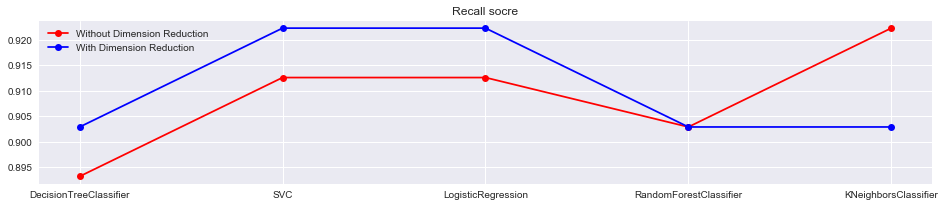

In [43]:
plt.figure(figsize=(16,3))
plt.plot(reca1, 'ro-', label='Without Dimension Reduction')
plt.plot(reca2, 'bo-', label='With Dimension Reduction')
plt.xticks(range(0,5), model_name)
plt.legend(loc='best')
plt.title('Recall socre')
plt.show()

### Result
We see with dimension reduction some estimators performed a little better such as Decision Tree.

## 6.c) Feature Importance
###  Select features with RandomForestClassifier

The accuracy is 94% and the results can be seen in confusion matrix

Accuracy is: 0.939086294416
Recall score is:  0.902912621359


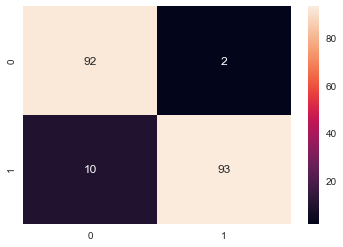

In [44]:
clf4.fit(x, y)
print('Accuracy is:', accuracy_score(y_test,clf4.predict(x_test)))
print('Recall score is: ', recall_score(y_test,clf4.predict(x_test)))
cm4 = confusion_matrix(y_test,clf4.predict(x_test))
sns.heatmap(cm4,annot=True,);

#### Recursive feature elimination (RFE) with random forest

In [45]:
## RFE
from sklearn.feature_selection import RFE
names = X.columns
# Create the RFE object and rank each pixel     
rfe = RFE(estimator=clf4,n_features_to_select=10, step=1)
rfe = rfe.fit(x, y)
# print(rfe.support_)
# print(rfe.ranking_)
print('The ranking of features:' '\n',
      sorted(list(zip(map(lambda x :round(x,4),rfe.ranking_),names))))
# print('Feature choosen by rfe:''\n', list(X.columns[rfe.support_]))


The ranking of features:
 [(1, 'V10'), (1, 'V11'), (1, 'V12'), (1, 'V14'), (1, 'V17'), (1, 'V20'), (1, 'V3'), (1, 'V4'), (1, 'V7'), (1, 'V8'), (2, 'V19'), (3, 'V26'), (4, 'V16'), (5, 'Amount'), (6, 'V13'), (7, 'V1'), (8, 'V6'), (9, 'V2'), (10, 'V23'), (11, 'V21'), (12, 'V18'), (13, 'V15'), (14, 'V25'), (15, 'V9'), (16, 'V22'), (17, 'V24'), (18, 'V28'), (19, 'V5'), (20, 'V27')]


#### Recursive feature elimination with cross validation (RFECV) and random forest classification

In [46]:
###  RFECV
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=clf4, step=1, cv=5,)   #5-fold cross-validation
rfecv = rfecv.fit(x, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :''\n', x.columns[rfecv.support_])
# print(rfecv.ranking_)
print('The ranking of features:' '\n',
      sorted(list(zip(map(lambda x :round(x,4),rfecv.ranking_),names))))

Optimal number of features : 17
Best features :
 Index(['V1', 'V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V16', 'V17', 'V19', 'V20', 'V26', 'Amount'],
      dtype='object')
The ranking of features:
 [(1, 'Amount'), (1, 'V1'), (1, 'V10'), (1, 'V11'), (1, 'V12'), (1, 'V13'), (1, 'V14'), (1, 'V16'), (1, 'V17'), (1, 'V19'), (1, 'V20'), (1, 'V26'), (1, 'V3'), (1, 'V4'), (1, 'V6'), (1, 'V7'), (1, 'V8'), (2, 'V2'), (3, 'V23'), (4, 'V21'), (5, 'V18'), (6, 'V15'), (7, 'V25'), (8, 'V9'), (9, 'V22'), (10, 'V24'), (11, 'V28'), (12, 'V5'), (13, 'V27')]


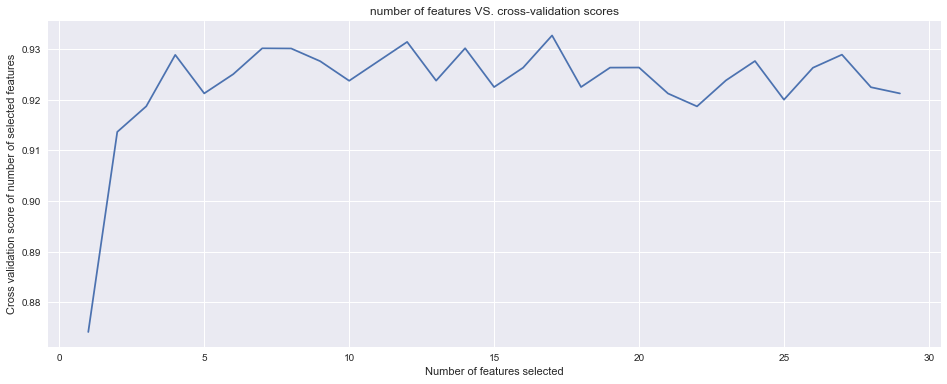

In [47]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.title('number of features VS. cross-validation scores')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

#### Tree based feature selection and random forest classification¶

Feature ranking:
1. feature 11 (0.153872)
2. feature 10 (0.130531)
3. feature 16 (0.114360)
4. feature 3 (0.111750)
5. feature 13 (0.099293)
6. feature 15 (0.059951)
7. feature 9 (0.059401)
8. feature 1 (0.052798)
9. feature 5 (0.039883)
10. feature 7 (0.014887)
11. feature 18 (0.013925)
12. feature 28 (0.013699)
13. feature 6 (0.013330)
14. feature 20 (0.012990)
15. feature 8 (0.012925)
16. feature 21 (0.010210)
17. feature 4 (0.009776)
18. feature 22 (0.009650)
19. feature 2 (0.009402)
20. feature 17 (0.008790)
21. feature 12 (0.008347)
22. feature 0 (0.006539)
23. feature 14 (0.005872)
24. feature 27 (0.005759)
25. feature 19 (0.005242)
26. feature 24 (0.005040)
27. feature 25 (0.004716)
28. feature 23 (0.003635)
29. feature 26 (0.003426)


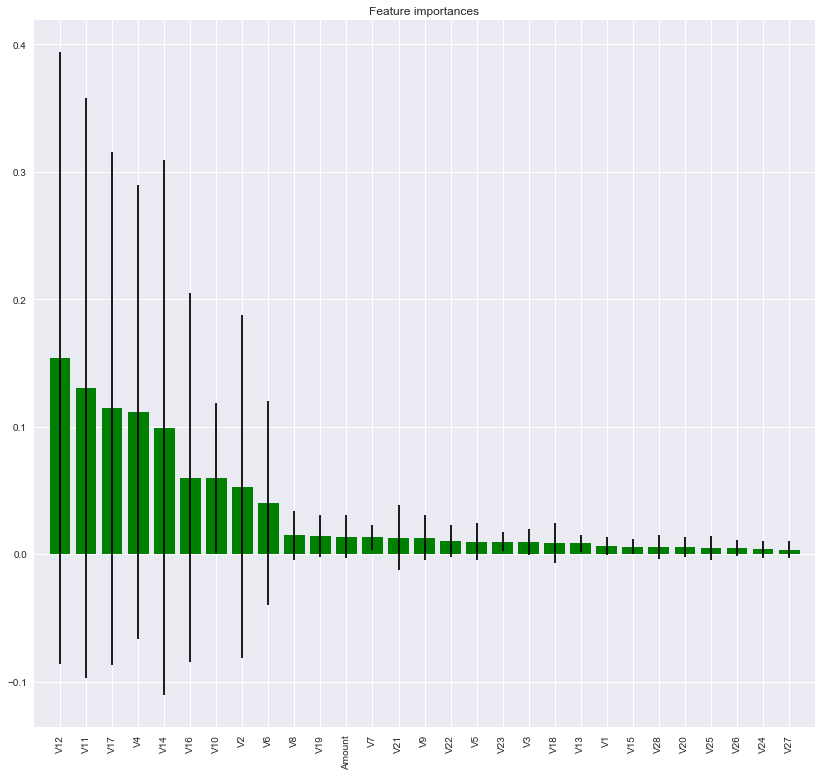

In [48]:
##RANDOM FOREST

importances = clf4.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf4.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), x.columns[indices],rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()


<a id='Effor Table'></a>